<a href="https://colab.research.google.com/github/marcus-vn-santos/ProjetoM1Squad7/blob/main/PROJETO_M4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória - Projeto M4 - Squad 7

---


<left><img alt="Analisando Airbnb" width="27%" src="https://www.resilia.com.br/wp-content/uploads/2021/08/logo.png"></left>
<left><img alt="Squad7" width="15%" src="https://drive.google.com/uc?id=1DG9VkOly916qcx6w6CHGYjkeLXEewut4"></left>
<right><img alt="gov.br" width="11%" src="https://play-lh.googleusercontent.com/qn6t9aaqbxUJDl9SMRlBkgG6SArPRfk_g_m5lyG6SjhpUfiW1PsHuJ6jSuL9GVDqnA"></right>



### **1. Objetivo do projeto:**

Realizar uma análise exploratória relacionada à série
histórica de preço de venda da gasolina e do etanol dos últimos dois meses do ano atual.

##### **1.1. Pacotes Python e coleta de dados**

Essa etapa tem como finalidade realizar a coleta dos dados sem nenhum tratatamento, descrever, explorar os mesmos e por fim avaliar a qualidade e integridade.

In [1]:
# Importação dos pacotes Python
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

Neste projeto foram utilizados dados dos últimos dois meses do ano atual (Julho e Agosto de 2022)

#####**1.2 Criação do DataFrame do mês de julho (df_julho)**

In [106]:
#Criação do DataFrame do mês de julho (df_julho)

df_julho = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2022/precos-gasolina-etanol-07.csv', sep=';', encoding='ISO-8859-1')
df_julho.columns = ['Regiao', 'Estado','Municipio','Revenda','CNPJ','Rua','Numero','Complemento','Bairro','CEP','Produto','Data da Coleta','Valor_de_Venda','Valor de Compra','Unidade de Medida','Bandeira']

#####**1.3 Criação do DataFrame do mês de Agosto (df_agosto)**

In [162]:

df_agosto = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2022/precos-gasolina-etanol-08.csv', sep=';', encoding='ISO-8859-1')
df_agosto.columns = ['Regiao', 'Estado','Municipio','Revenda','CNPJ','Rua','Numero','Complemento','Bairro','CEP','Produto','Data da Coleta','Valor_de_Venda','Valor de Compra','Unidade de Medida','Bandeira']

#####**1.4 União dos meses  de Julho (df_julho) e Agosto (df_agosto) em um único DataFrame (df_completo)**

In [163]:
frames = [df_agosto,df_julho]
df_completo = pd.concat(frames)

### **2. Descrevendo os dados**

Uma vez que possuímos um Dataset com todas os dados que serão usados para o desenvolvimento do projeto, será avaliado a dimensão do Dataset e tipos de variáveis presentes.

In [164]:
df_completo.shape

(127176, 16)

Com a função .shape foi possível concluir que o Dataset possui incialmenteum total de **127176** linhas/entradas, e **16** colunas/variáveis. Em seguida, é realizada a análise do tipo de variável presente nas 16 colunas, e em seguida é apresentado um dicionário das variáveis presentes.

In [165]:
display(df_completo.dtypes)

Regiao                object
Estado                object
Municipio             object
Revenda               object
CNPJ                  object
Rua                   object
Numero                object
Complemento           object
Bairro                object
CEP                   object
Produto               object
Data da Coleta        object
Valor_de_Venda        object
Valor de Compra      float64
Unidade de Medida     object
Bandeira              object
dtype: object

**Dicionário das variáveis**

* `Região` - Região onde cada estabelecimento está localizado.
* `Estado` - Estado onde cada estabelecimento está localizado.
* `Municipio` - Município onde cada estabelecimento está localizado.
* `Revenda` - Nome de cada estabelecimento.
* `CNPJ` - Cadastro Nacional de Pessoas Jurídicas. Nesse caso, de cada estabelecimento.
* `Rua` - Rua onde cada estabelecimento está localizado.
* `Numero` - Número do endereço onde cada estabelecimento está localizado.
* `Complemento` - Complemento ao endereço onde cada estabelecimento está localizado.
* `Bairro` - Bairro onde cada estabelecimento está localizado.
* `CEP` - Código de Endereço Postal de cada estabelecimento.
* `Produto` - Tipo de produto vendido pelos estabelecimentos.
* `Data de Coleta` - Data em que foi realizada a coleta do dado.
* `Valor de Venda` - Valor de Venda do Produto para o cliente.
* `Valor de Compra` - Valor de Compra do Produto pelo estabelecimento.
* `Unidade de Medida` - Unidade de Medida usada na venda do produto.
* `Bandeira` - Bandeira do estabelecimento que realiza a venda do produto.

#### **2.1 - Estatísticas Descritivas**




Primeiro será avaliado a qualidade dos dados presentes, e sua integridade (% de valores nulos dentro de cada variável)

In [111]:
(df_completo.isnull().sum() / df_completo.shape[0]).sort_values(ascending=False)

Valor de Compra      1.000000
Complemento          0.787075
Bairro               0.003240
Numero               0.000558
Regiao               0.000000
Estado               0.000000
Municipio            0.000000
Revenda              0.000000
CNPJ                 0.000000
Rua                  0.000000
CEP                  0.000000
Produto              0.000000
Data da Coleta       0.000000
Valor_de_Venda       0.000000
Unidade de Medida    0.000000
Bandeira             0.000000
dtype: float64

**Quanto à questão de dados faltantes, em uma breve verificação podemos identificar que:**

* A coluna **`Valor de Compra`** possui quase 100% dos seus valores faltantes.
* A coluna **`Complemento`** possui cerca de 79% dos seus valores faltantes.
* A coluna **`Bairro`** possui cerca de 0,3% dos seus valores faltantes.
* A coluna **`Numero`** possui cerca de 0,06% dos seus valores faltantes.


Ao analisar as perguntas que serão respondidas pelo projeto (item 3.1) e o resultado da avaliação de variáveis com valores nulos é possível concluir que apenas 2 colunas possuem um valor expressivo de valores faltantes. No entanto, ambas não terão impacto no desenvolvimento do projeto, visto que trazem dados que não serão utilizados na solução das perguntas.

Por fim, após análise inicial das variáveis e integridade dos dados, teremos o primeiro contato com o nosso Dataset.

In [166]:
#Visualização das primeiras cinco linhas do Dataset.
df_completo.head()

,Regiao,Estado,Municipio,Revenda,CNPJ,Rua,Numero,Complemento,Bairro,CEP,Produto,Data da Coleta,Valor_de_Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,08.738.994/0001-50,RODOVIA AL-220,5848,KM 96,BOM SUCESSO,57309-035,ETANOL,01/08/2022,"4,79",NaN,R$ / litro,VIBRA ENERGIA
1,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,08.738.994/0001-50,RODOVIA AL-220,5848,KM 96,BOM SUCESSO,57309-035,GASOLINA,01/08/2022,"5,59",NaN,R$ / litro,VIBRA ENERGIA
2,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,07.248.398/0001-29,RODOVIA AL 220,4698,NaN,PLANALTO,57308-000,GASOLINA ADITIVADA,01/08/2022,"5,99",NaN,R$ / litro,BRANCA
3,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,07.248.398/0001-29,RODOVIA AL 220,4698,NaN,PLANALTO,57308-000,ETANOL,01/08/2022,"4,99",NaN,R$ / litro,BRANCA
4,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,07.248.398/0001-29,RODOVIA AL 220,4698,NaN,PLANALTO,57308-000,GASOLINA,01/08/2022,"5,79",NaN,R$ / litro,BRANCA


In [167]:
#Visualização das últimas cinco linhas do Dataset.
df_completo.tail()

,Regiao,Estado,Municipio,Revenda,CNPJ,Rua,Numero,Complemento,Bairro,CEP,Produto,Data da Coleta,Valor_de_Venda,Valor de Compra,Unidade de Medida,Bandeira
57627,SE,MG,DIVINOPOLIS,AUTO POSTO DE COMBUSTIVEIS ATACADAO LTDA,32.924.614/0001-56,RUA CASTRO ALVES,2400,NaN,CATALAO,35501-205,GASOLINA,29/07/2022,"5,38",NaN,R$ / litro,BRANCA
57628,S,RS,PORTO ALEGRE,LUIZ GUSTAVO DI LORENZO GARCIA SCHERER,34.792.562/0001-37,AVENIDA BENTO GONCALVES,2599,NaN,PARTENON,90650-003,GASOLINA ADITIVADA,29/07/2022,"5,46",NaN,R$ / litro,BRANCA
57629,S,RS,PORTO ALEGRE,LUIZ GUSTAVO DI LORENZO GARCIA SCHERER,34.792.562/0001-37,AVENIDA BENTO GONCALVES,2599,NaN,PARTENON,90650-003,GASOLINA,29/07/2022,"5,46",NaN,R$ / litro,BRANCA
57630,NE,MA,CAXIAS,POSTAO COMERCIO DE COMBUSTIVEIS LTDA,31.597.569/0001-00,RODOVIA BR-316,S/N,KM 552 SALA A,VOLTA REDONDA,65606-525,GASOLINA ADITIVADA,29/07/2022,"5,68",NaN,R$ / litro,BRANCA
57631,NE,MA,CAXIAS,POSTAO COMERCIO DE COMBUSTIVEIS LTDA,31.597.569/0001-00,RODOVIA BR-316,S/N,KM 552 SALA A,VOLTA REDONDA,65606-525,GASOLINA,29/07/2022,"5,68",NaN,R$ / litro,BRANCA


### **3 - Limpeza do Banco de Dados**

####**3.1. - Análise de Outliers**

A verificação de Outliers será realizada em três passos:
* 1 - Resumo Estatístico dos dados presentes utilizando a função .describe()
* 2 - Visualização do gráfico de histograma
* 3 - Análise da Amplitude Interquartil

Para o desenvolvimento do Projeto, convertemos a formatação da variável 'Valor_de_Venda', alterando a separação entre a parte inteira e decimal de ',' para '.', e garantimos que o seu tipo seja 'float' (valor decimais).

In [171]:
# alterando tipo da variável
df_completo['Valor_de_Venda'] = df_completo['Valor_de_Venda'].str.replace(',', '.')
df_completo['Valor_de_Venda']= df_completo['Valor_de_Venda'].astype(float)

##### **3.2 - Visualização do gráfico de histograma da variável 'Valor_de_Venda'**

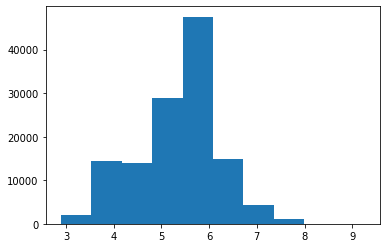

In [172]:
plt.hist(x = df_completo['Valor_de_Venda']);

Analisando o gráfico acima ainda não é possível concluir a análise de Outliers apesar da distruibuição aparentemente normal.

In [173]:
df_completo['Valor_de_Venda'].describe()

count    127176.000000
mean          5.355503
std           0.860449
min           2.890000
25%           4.880000
50%           5.490000
75%           5.890000
max           9.270000
Name: Valor_de_Venda, dtype: float64

Com a função .describe() encontramos os primeiros indícios de Outliers. Comparando, por exemplo, o valor máximo da variável 'Valor_de_Venda', **9.27**, com o Q3, **5.89**, observamos que o maior valor do nosso dataset é cerca de **58%** maior que 75% de todos os valores, e cerca de **73%** maior que a média dessa variável.


Encontrados os primeiros indícios, será utilizado o metódo **Análise da Amplitude Interquartil** para a avaliação de todos os valores que possam ou não se enquadrar como OutLiers. 

Esse método tem como parâmetros três variáveis, sendo elas: 

* IIQ - Intervalo InterQuartil (Q3 - Q1)
* Q1 - Primerio Quartil (25%)
* Q3 - Terceiro Quartil (75)

Serão considerados valores OutLiers os que não respeitarem as seguintes regras:
* Outlier abaixo: valor da variável < Q1 - FIG * 1.5
* Outlier acima: valor da variável > Q3 + FIG * 1.5


#####  **3.3 - Desenvolvimento da Análise de Amplitude Interquartil**

In [174]:
#Geração das variáveis Q1, Q3 e FIG
Q1 = df_completo['Valor_de_Venda'].quantile(0.25)
Q3 = df_completo['Valor_de_Venda'].quantile(0.75)
IIQ = Q3 - Q1
IIQ


1.0099999999999998

In [138]:
outlier_baixo = Q1 - (1.5 * IIQ)
outlier_baixo

3.365

In [175]:
outlier_alto = Q3 + (1.5 * IIQ)
outlier_alto

7.404999999999999

In [176]:
#Análise dos valores, e remoção dos que forem considerados Outliers.
df_completo = df_completo.drop(df_completo[(df_completo.Valor_de_Venda < outlier_baixo) | (df_completo.Valor_de_Venda > outlier_alto)].index)
df_completo

,Regiao,Estado,Municipio,Revenda,CNPJ,Rua,Numero,Complemento,Bairro,CEP,Produto,Data da Coleta,Valor_de_Venda,Valor de Compra,Unidade de Medida,Bandeira
1,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,08.738.994/0001-50,RODOVIA AL-220,5848,KM 96,BOM SUCESSO,57309-035,GASOLINA,01/08/2022,5.59,NaN,R$ / litro,VIBRA ENERGIA
2,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,07.248.398/0001-29,RODOVIA AL 220,4698,NaN,PLANALTO,57308-000,GASOLINA ADITIVADA,01/08/2022,5.99,NaN,R$ / litro,BRANCA
3,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,07.248.398/0001-29,RODOVIA AL 220,4698,NaN,PLANALTO,57308-000,ETANOL,01/08/2022,4.99,NaN,R$ / litro,BRANCA
4,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,07.248.398/0001-29,RODOVIA AL 220,4698,NaN,PLANALTO,57308-000,GASOLINA,01/08/2022,5.79,NaN,R$ / litro,BRANCA
5,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,GASOLINA ADITIVADA,01/08/2022,6.09,NaN,R$ / litro,VIBRA ENERGIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57627,SE,MG,DIVINOPOLIS,AUTO POSTO DE COMBUSTIVEIS ATACADAO LTDA,32.924.614/0001-56,RUA CASTRO ALVES,2400,NaN,CATALAO,35501-205,GASOLINA,29/07/2022,5.38,NaN,R$ / litro,BRANCA
57628,S,RS,PORTO ALEGRE,LUIZ GUSTAVO DI LORENZO GARCIA SCHERER,34.792.562/0001-37,AVENIDA BENTO GONCALVES,2599,NaN,PARTENON,90650-003,GASOLINA ADITIVADA,29/07/2022,5.46,NaN,R$ / litro,BRANCA
57629,S,RS,PORTO ALEGRE,LUIZ GUSTAVO DI LORENZO GARCIA SCHERER,34.792.562/0001-37,AVENIDA BENTO GONCALVES,2599,NaN,PARTENON,90650-003,GASOLINA,29/07/2022,5.46,NaN,R$ / litro,BRANCA
57630,NE,MA,CAXIAS,POSTAO COMERCIO DE COMBUSTIVEIS LTDA,31.597.569/0001-00,RODOVIA BR-316,S/N,KM 552 SALA A,VOLTA REDONDA,65606-525,GASOLINA ADITIVADA,29/07/2022,5.68,NaN,R$ / litro,BRANCA


In [177]:
df_completo.shape

(124438, 16)

Após a execução da Análise de Amplitude InterQuartil é possível observar que **2738** linhas foram removidas do nosso Dataset, eliminando assim possíveis disturbios na solução das perguntas.

##### **3.4 - Remoção de colunas não relevantes para análise**

Agora serão eliminadas as variáveis/colunas que não serão utilizadas na solução das perguntas e/ou possuem uma quantidade expressiva de valores nulos com  objetivo de melhorar a execução do código.

In [178]:
df_completo.drop(["Valor de Compra","Unidade de Medida","CNPJ","Rua","Numero","Complemento","CEP"], axis=1, inplace=True)
df_completo

,Regiao,Estado,Municipio,Revenda,Bairro,Produto,Data da Coleta,Valor_de_Venda,Bandeira
1,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,BOM SUCESSO,GASOLINA,01/08/2022,5.59,VIBRA ENERGIA
2,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,PLANALTO,GASOLINA ADITIVADA,01/08/2022,5.99,BRANCA
3,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,PLANALTO,ETANOL,01/08/2022,4.99,BRANCA
4,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,PLANALTO,GASOLINA,01/08/2022,5.79,BRANCA
5,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,CANAFISTULA,GASOLINA ADITIVADA,01/08/2022,6.09,VIBRA ENERGIA
...,...,...,...,...,...,...,...,...,...
57627,SE,MG,DIVINOPOLIS,AUTO POSTO DE COMBUSTIVEIS ATACADAO LTDA,CATALAO,GASOLINA,29/07/2022,5.38,BRANCA
57628,S,RS,PORTO ALEGRE,LUIZ GUSTAVO DI LORENZO GARCIA SCHERER,PARTENON,GASOLINA ADITIVADA,29/07/2022,5.46,BRANCA
57629,S,RS,PORTO ALEGRE,LUIZ GUSTAVO DI LORENZO GARCIA SCHERER,PARTENON,GASOLINA,29/07/2022,5.46,BRANCA
57630,NE,MA,CAXIAS,POSTAO COMERCIO DE COMBUSTIVEIS LTDA,VOLTA REDONDA,GASOLINA ADITIVADA,29/07/2022,5.68,BRANCA


#### **3.5 - Validando e Deletando duplicidades**

E por fim, serão removidos as linhas que possuem valores duplicados.

In [184]:
duplicados = df_completo[df_completo.duplicated(keep='first')]
print(duplicados)

Empty DataFrame
Columns: [Regiao, Estado, Municipio, Revenda, Bairro, Produto, Data da Coleta, Valor_de_Venda, Bandeira]
Index: []


In [185]:
df_completo.drop_duplicates(keep='first', inplace=True)
df_completo

,Regiao,Estado,Municipio,Revenda,Bairro,Produto,Data da Coleta,Valor_de_Venda,Bandeira
7,CO,GO,GOIANIA,VIENA AUTO POSTO EIRELI,VI ROSA,GASOLINA ADITIVADA,01/07/2022,6.89,BRANCA
40,SE,SP,VALINHOS,CENTRO AUTOMOTIVO DE VALINHOS LTDA,VILA CAPUAVA,GASOLINA,01/07/2022,6.69,BRANCA
39,SE,SP,VALINHOS,CENTRO AUTOMOTIVO DE VALINHOS LTDA,VILA CAPUAVA,ETANOL,01/07/2022,4.29,BRANCA
38,SE,SP,VALINHOS,CENTRO AUTOMOTIVO DE VALINHOS LTDA,VILA CAPUAVA,GASOLINA ADITIVADA,01/07/2022,6.79,BRANCA
36,SE,RJ,TRES RIOS,AUTO POSTO RODO TREVO LTDA,CENTRO,ETANOL,01/07/2022,6.29,RAIZEN
...,...,...,...,...,...,...,...,...,...
66905,SE,SP,SAO PAULO,AUTO POSTO DOM JOSE LTDA,JARDIM DOM JOSE,GASOLINA ADITIVADA,31/08/2022,6.29,RAIZEN
66906,SE,SP,SAO PAULO,ESCALADA AUTO POSTO LTDA,SANTO AMARO,ETANOL,31/08/2022,3.49,RAIZEN
66907,SE,SP,SAO PAULO,ESCALADA AUTO POSTO LTDA,SANTO AMARO,GASOLINA,31/08/2022,4.99,RAIZEN
66894,SE,SP,SAO PAULO,AUTO POSTO BRAGANCA LTDA,JD TREMEMBE,GASOLINA ADITIVADA,31/08/2022,5.27,VIBRA ENERGIA


##### **4.1. Análise Exploratória de Dados - Problemas Investigados no Projeto de DS**

* 1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e
da gasolina tiveram uma de queda ou diminuição?
* 2. Qual o preço médio da gasolina e do etanol nesses dois meses?
* 3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?
* 4. Qual o preço médio da gasolina e do etanol por estado?
* 5. Qual o município que possui o menor preço para a gasolina e para o etanol?
* 6. Qual o município que possui o maior preço para a gasolina e para o etanol?
* 7. Qual a região que possui o maior valor médio da gasolina?
* 8. Qual a região que possui o menor valor médio do etanol?
* 9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?
* 10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

*3*. **Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?**

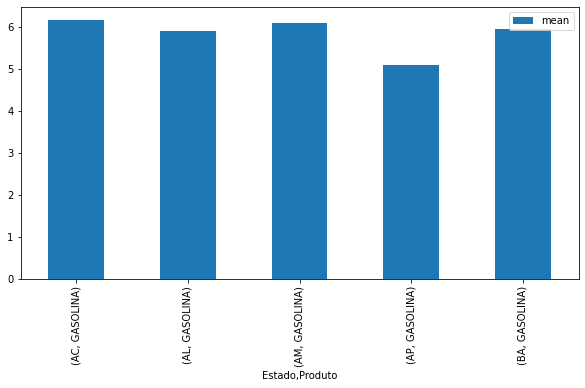

In [186]:
df_completo.query('Produto== "GASOLINA"').groupby(['Estado','Produto'])['Valor_de_Venda'].agg(['mean']).head(5).plot(kind='bar', figsize=(10,5));

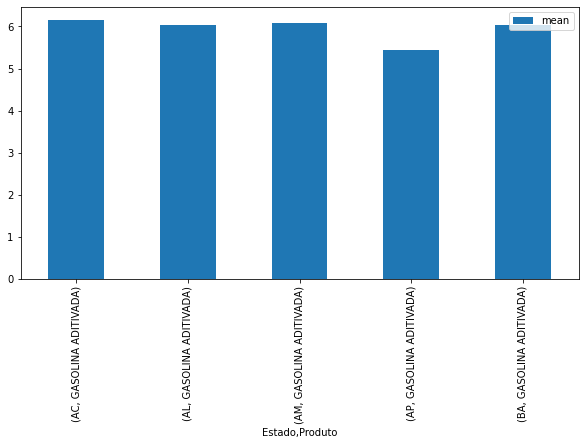

In [187]:
df_completo.query('Produto== "GASOLINA ADITIVADA"').groupby(['Estado','Produto'])['Valor_de_Venda'].agg(['mean']).head(5).plot(kind='bar', figsize=(10,5));

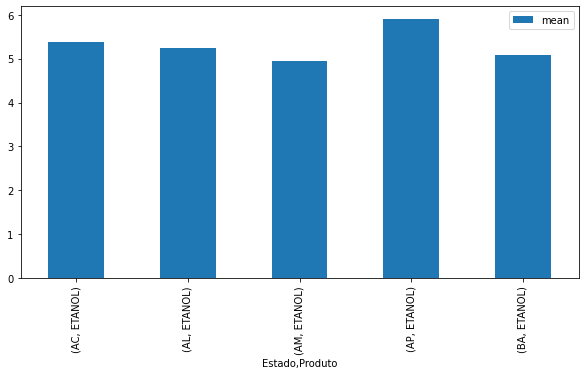

In [188]:
df_completo.query('Produto== "ETANOL"').groupby(['Estado','Produto'])['Valor_de_Venda'].agg(['mean']).head(5).plot(kind='bar', figsize=(10,5));

*4*. **Qual o preço médio da gasolina e do etanol por estado?**

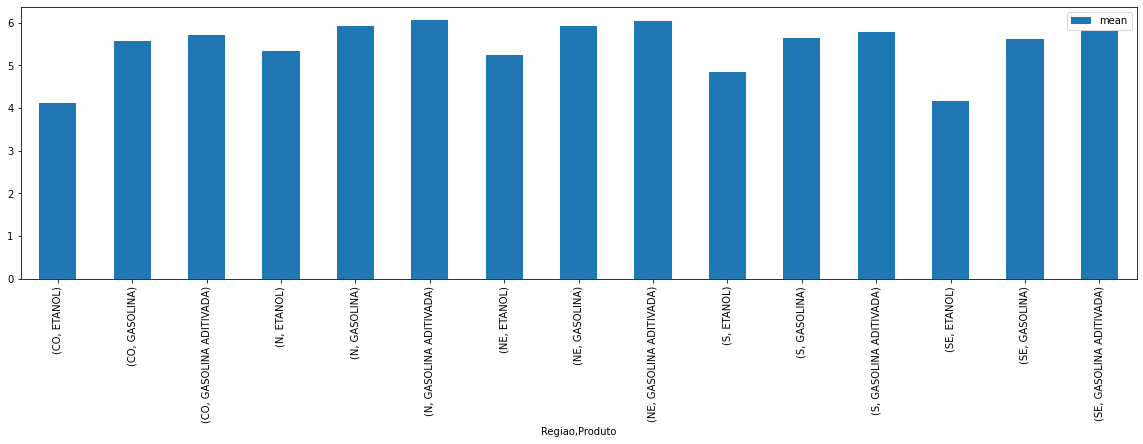

In [189]:
# valor de venda máximo, minimo, medio e mediana de combustível por estado
df_completo_comb = df_completo
df_completo_comb.groupby(['Regiao','Produto'])['Valor_de_Venda'].agg(['mean']).plot(kind='bar', figsize=(20,5));

*5*. **Qual o município que possui o menor preço para a gasolina e para o etanol?**

In [190]:
#5. Qual municipio possui o menor preço para a gasolina e para o etanol?

df_produto_municipio = df_completo.groupby(['Produto', 'Municipio'])
df_minima_municipio = df_produto_municipio[['Valor_de_Venda']].min()

#Etanol

df_min_municipio_etanol = df_minima_municipio.loc['ETANOL'].sort_values(by = 'Valor_de_Venda')
df_min_municipio_etanol = df_min_municipio_etanol.reset_index().head(1)
df_min_municipio_etanol['Produto'] = 'Etanol'

#Gasolina

df_min_municipio_gasolina = df_minima_municipio.loc['GASOLINA'].sort_values(by = 'Valor_de_Venda')
df_min_municipio_gasolina = df_min_municipio_gasolina.reset_index().head(1)
df_min_municipio_gasolina['Produto'] = 'Gasolina'

#Gasolina Aditivada

df_min_municipio_gasolina_adt = df_minima_municipio.loc['GASOLINA ADITIVADA'].sort_values(by = 'Valor_de_Venda')
df_min_municipio_gasolina_adt = df_min_municipio_gasolina_adt.reset_index().head(1)
df_min_municipio_gasolina_adt['Produto'] = 'Gasolina Aditivada'

df_minimos_municipio = pd.concat([df_min_municipio_etanol,df_min_municipio_gasolina,df_min_municipio_gasolina_adt])

#criando tabela final (minimas)com resultados
minimas_por_municipio = df_minimos_municipio[['Produto','Municipio','Valor_de_Venda']]
minimas_por_municipio

,Produto,Municipio,Valor_de_Venda
0,Etanol,TAUBATE,3.37
0,Gasolina,PASSO FUNDO,4.13
0,Gasolina Aditivada,PASSO FUNDO,4.13


*6*. **Qual o município que possui o maior preço para a gasolina e para o etanol?**

In [191]:
df_maxima_municipio = df_produto_municipio[['Valor_de_Venda']].max()

#Etanol

df_max_municipio_etanol = df_maxima_municipio.loc['ETANOL'].sort_values(by = 'Valor_de_Venda')
df_max_municipio_etanol = df_max_municipio_etanol.reset_index().head(1)
df_max_municipio_etanol['Produto'] = 'Etanol'

#Gasolina

df_max_municipio_gasolina = df_maxima_municipio.loc['GASOLINA'].sort_values(by = 'Valor_de_Venda')
df_max_municipio_gasolina = df_max_municipio_gasolina.reset_index().head(1)
df_max_municipio_gasolina['Produto'] = 'Gasolina'

#Gasolina Aditivada

df_max_municipio_gasolina_adt = df_maxima_municipio.loc['GASOLINA ADITIVADA'].sort_values(by = 'Valor_de_Venda')
df_max_municipio_gasolina_adt = df_max_municipio_gasolina_adt.reset_index().head(1)
df_max_municipio_gasolina_adt['Produto'] = 'Gasolina Aditivada'

df_maximas_municipio = pd.concat([df_max_municipio_etanol,df_max_municipio_gasolina,df_max_municipio_gasolina_adt])

#criando tabela final (minimas)com resultados
maximas_por_municipio = df_maximas_municipio[['Produto','Municipio','Valor_de_Venda']]
maximas_por_municipio

,Produto,Municipio,Valor_de_Venda
0,Etanol,VARZEA GRANDE,3.99
0,Gasolina,SANTANA,5.59
0,Gasolina Aditivada,SANTANA,5.53


*10*. **Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?**

In [192]:
# agrupando bandeiras por regiões
bandeiras = df_completo[(df_completo['Bandeira'] == 'RAIZEN')|\
                   (df_completo['Bandeira'] == 'PETROBRAS DISTRIBUIDORA S.A.')|\
                   (df_completo['Bandeira'] == 'IPIRANGA')|\
                   (df_completo['Bandeira'] == 'ALESAT')].groupby(['Regiao','Bandeira'])
bandeiras_describe = bandeiras['Valor_de_Venda'].describe()
bandeiras_describe
# por essa descrição é posível realizar varias analises :
#Pela contagem, podemos ver qual bandeira é mais usada nacionalmente e por Região.
#Pela média é possível ter o valor médio de cada bandeira por Região
#Pelo min e máx, podemos ver o valor maximo e minimo de venda de cada bandera por Região e etc.

count      mean       std   min    25%    50%    75%   max
Regiao Bandeira                                                              
CO     ALESAT      182.0  4.803132  0.889035  3.39  3.990  4.875  5.545  6.95
       IPIRANGA   1690.0  5.096917  0.829585  3.37  4.380  5.230  5.750  7.15
       RAIZEN     1579.0  5.167492  0.864455  3.37  4.490  5.390  5.790  7.39
N      ALESAT       66.0  5.908182  0.609645  4.69  5.675  5.860  6.290  7.40
       IPIRANGA   1147.0  5.932023  0.607794  4.26  5.490  5.890  6.375  7.40
       RAIZEN      146.0  5.957329  0.634188  4.59  5.590  5.980  6.380  7.29
NE     ALESAT      719.0  5.805925  0.637827  4.26  5.375  5.740  6.245  7.40
       IPIRANGA   2012.0  5.761128  0.632457  3.99  5.380  5.750  6.090  7.39
       RAIZEN     4026.0  5.742491  0.648635  3.99  5.290  5.740  6.150  7.40
S      ALESAT      287.0  5.543763  0.508834  3.84  5.260  5.690  5.890  6.85
       IPIRANGA   4927.0  5.556000  0.632621  3.49  5.190  5.590  5.980  7.39
       RAIZEN     2588.0  5.486662  0.647346  3.69  5.090  5.590  5.890  7.39
SE     ALESAT     1339.0  5.257842  0.845042  3.39  4.590  5.450  5.890  7.39
       IPIRANGA  10660.0  5.213114  0.896641  3.37  4.380  5.480  5.890  7.40
       RAIZEN    12027.0  5.221698  0.870307  3.37  4.380  5.490  5.890  7.39

Através das próximas consultas, podemos ver que o valor de venda médio por produto de cada bandeira é muito próximo :

In [193]:
df_completo.query('Bandeira== "ALESAT"').groupby(['Produto'])['Valor_de_Venda'].agg(['mean'])

,mean
Produto,
ETANOL,4.676508
GASOLINA,5.784924
GASOLINA ADITIVADA,5.899937


In [194]:
df_completo.query('Bandeira== "IPIRANGA"').groupby(['Produto'])['Valor_de_Venda'].agg(['mean'])

,mean
Produto,
ETANOL,4.473407
GASOLINA,5.700998
GASOLINA ADITIVADA,5.904262


In [195]:
df_completo.query('Bandeira== "RAIZEN"').groupby(['Produto'])['Valor_de_Venda'].agg(['mean'])

,mean
Produto,
ETANOL,4.475339
GASOLINA,5.703424
GASOLINA ADITIVADA,5.928062


*Extra n°1*. **No ultimo mês, qual foi o combustível mais caro e o mais barato ?**

In [196]:
#filtro do ultimo mês
filtered_df =df_completo.loc[(df_completo['Data da Coleta'] >= '01/08/2022	') & (df_completo['Data da Coleta'] < '31/08/2022')]
filtered_df

,Regiao,Estado,Municipio,Revenda,Bairro,Produto,Data da Coleta,Valor_de_Venda,Bandeira
7497,NE,BA,JACOBINA,TRANSVALE DERIVADOS DE PETROLEO LTDA,CENTRO,ETANOL,02/08/2022,5.09,IPIRANGA
7496,NE,BA,JACOBINA,TRANSVALE DERIVADOS DE PETROLEO LTDA,CENTRO,GASOLINA ADITIVADA,02/08/2022,6.14,IPIRANGA
7495,SE,SP,SAO JOAO DA BOA VISTA,MAGA COMBUSTIVEIS LTDA,CENTRO,GASOLINA,02/08/2022,5.19,BRANCA
7494,SE,SP,SAO JOAO DA BOA VISTA,MAGA COMBUSTIVEIS LTDA,CENTRO,ETANOL,02/08/2022,3.79,BRANCA
7507,SE,SP,HORTOLANDIA,AUTO POSTO PINHEIRO DE HORTOLÃNDIA LTDA.,PARQUE DOS PINHEIROS,ETANOL,02/08/2022,3.69,BRANCA
...,...,...,...,...,...,...,...,...,...
64197,NE,PE,VITORIA DE SANTO ANTAO,R. L. I. COMBUSTIVEIS E SERVICOS LTDA,MATRIZ,GASOLINA,30/08/2022,5.29,RAIZEN
64198,CO,GO,CATALAO,AUTO POSTO JOIA COMBUSTIVEIS LTDA.,SAO JOAO,GASOLINA ADITIVADA,30/08/2022,4.99,BRANCA
64199,CO,GO,CATALAO,AUTO POSTO JOIA COMBUSTIVEIS LTDA.,SAO JOAO,ETANOL,30/08/2022,3.39,BRANCA
64200,NE,PE,SANTA CRUZ DO CAPIBARIBE,POSTO ATUAL LTDA,MALAQUIAS CARDOSO,GASOLINA ADITIVADA,30/08/2022,5.39,VIBRA ENERGIA


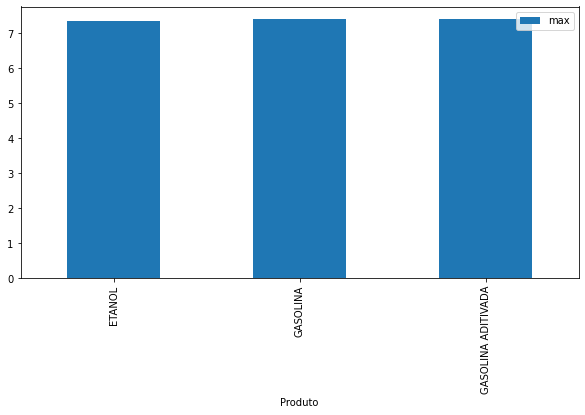

In [197]:
# usando o df filtrado do mês de agosto, conseguimos agrupar o valor máximo de cada produto e validar qual o mais caro e mais barato nesse ultimo mês
filtered_df.groupby(['Produto'])['Valor_de_Venda'].agg(['max']).plot(kind='bar', figsize=(10,5));